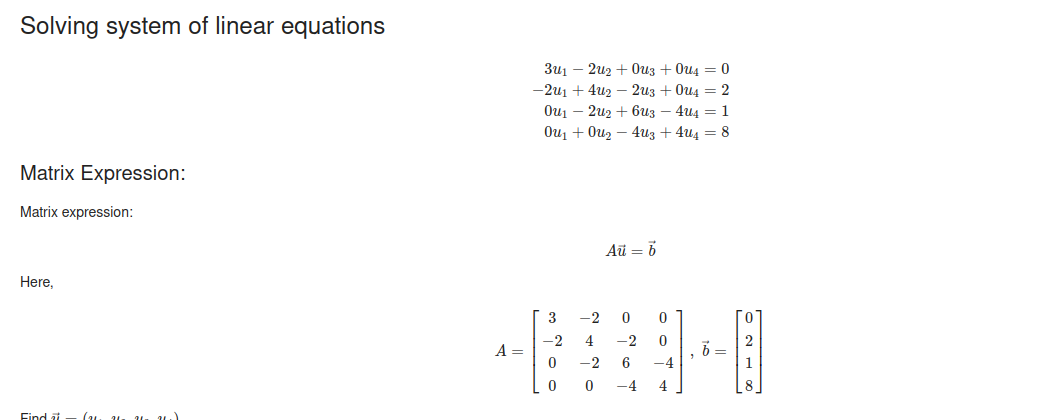

In [23]:
import numpy as np
A = np.array([[ 3., -2., 0.,  0.],
              [-2., 4., -2.,  0.],
              [ 0.,  -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

print (A)

[[ 3. -2.  0.  0.]
 [-2.  4. -2.  0.]
 [ 0. -2.  6. -4.]
 [ 0.  0. -4.  4.]]


In [24]:
import numpy as np
A = np.array([[ 3., -2., 0.,  0.],
              [-2., 4., -2.,  0.],
              [ 0.,  -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

print (A)

b = np.array([0,2,1,8])
print(b)
Sol_u = np.linalg.solve(A,b)
print (Sol_u)




[[ 3. -2.  0.  0.]
 [-2.  4. -2.  0.]
 [ 0. -2.  6. -4.]
 [ 0.  0. -4.  4.]]
[0 2 1 8]
[11.  16.5 21.  23. ]


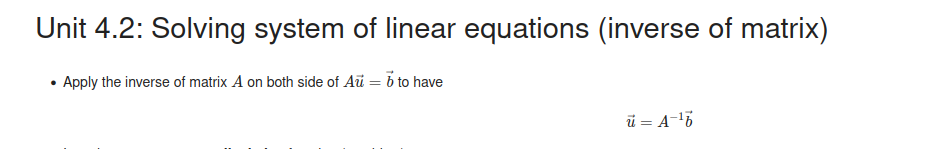

In [25]:
A_inv = np.linalg.inv(A)
#print (A_inv)

Sol2_u = np.dot(A_inv, b)
print (Sol2_u)


[11.  16.5 21.  23. ]


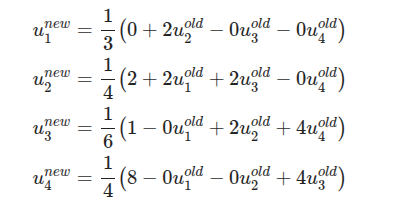

In [2]:
import numpy as np

u_old = np.array([0.,0.,0.,0.])
u_new = np.array([0.,0.,0.,0.])
#u_new = [u1,u2,u3,u4]
u_new[0] = 1./3. *( 0. + 2. * u_old[1]  - 0. * u_old[2] - 0. * u_old[3])
u_new[1] = 1./4. *( 2. + 2. * u_old[0]  + 2.* u_old[2] - 0. * u_old[3])
u_new[2] = 1./6. *( 1 - 0. * u_old[0]  + 2.* u_old[1] + 4. * u_old[3])
u_new[3] = 1./4. *( 8. - 0. * u_old[0]  - 0. * u_old[1] + 4. * u_old[2])

print (u_new)

[0.         0.5        0.16666667 2.        ]


In [3]:
print (u_old)
print (u_new)





[0. 0. 0. 0.]
[0.         0.5        0.16666667 2.        ]


In [30]:
u_old = [0.0, 0.5, 0.16666666666666666, 2.0]

u_new[0] = 1./3. *( 0. + 2. * u_old[1]  - 0. * u_old[2] - 0. * u_old[3])
u_new[1] = 1./4. *( 2. + 2. * u_old[0]  + 2.* u_old[2] - 0. * u_old[3])
u_new[2] = 1./6. *( 1 - 0. * u_old[0]  + 2.* u_old[1] + 4. * u_old[3])
u_new[3] = 1./4. *( 8. - 0. * u_old[0]  - 0. * u_old[1] + 4. * u_old[2])

print (u_new)


[0.3333333333333333, 0.5833333333333334, 1.6666666666666665, 2.1666666666666665]


In [13]:
u_old = np.array([0.,0.,0.,0.])
u_new = np.array([0.,0.,0.,0.])

for n_iter in range(501):
    u_new[0] = 1./3. *( 0. + 2. * u_old[1]  - 0. * u_old[2] - 0. * u_old[3])
    u_new[1] = 1./4. *( 2. + 2. * u_old[0]  + 2.* u_old[2] - 0. * u_old[3])
    u_new[2] = 1./6. *( 1 - 0. * u_old[0]  + 2.* u_old[1] + 4. * u_old[3])
    u_new[3] = 1./4. *( 8. - 0. * u_old[0]  - 0. * u_old[1] + 4. * u_old[2])
    if n_iter%100 ==0:
        print ("number of interation %d"%n_iter)   
        print (u_new)
    u_old[:] = u_new[:]







number of interation 0
[0.         0.5        0.16666667 2.        ]
number of interation 100
[10.73887918 16.13441122 20.53500221 22.53176251]
number of interation 200
[10.99412399 16.49177315 20.98953615 22.98946324]
number of interation 300
[10.99986777 16.49981487 20.99976453 22.99976289]
number of interation 400
[10.99999702 16.49999583 20.9999947  22.99999466]
number of interation 500
[10.99999993 16.49999991 20.99999988 22.99999988]


In [26]:
A = np.array([[ 3., -2.,  0.,  0.],
              [-2.,  4., -2.,  0.],
              [ 0., -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

D = np.array([[ 3., 0., 0., 0.],
              [ 0., 4., 0., 0.],
              [ 0., 0., 6., 0.],
              [ 0., 0., 0., 4.]])


L = np.array([[ 0.,  0.,  0.,  0.],
              [-2.,  0.,  0.,  0.],
              [ 0., -2.,  0.,  0.],
              [ 0.,  0., -4.,  0.]])

U = np.array([[ 0., -2., 0.,  0.],
              [ 0., 0., -2.,  0.],
              [ 0.,  0., 0., -4.],
              [ 0.,  0., 0.,  0.]])

b_vec = np.array([0,2,1,8])


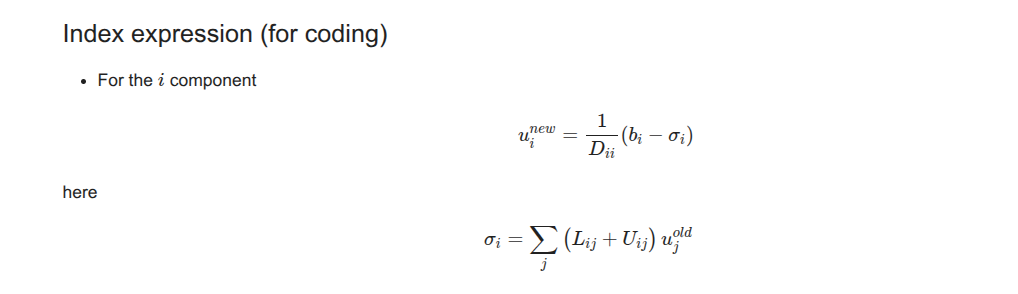

In [34]:
u_old = np.array([0.,0.,0.,0.])
u_new = np.array([0.,0.,0.,0.])

for n_iter in range(501):
    #====
    for i in range(4): 
        simga_i = 0.
        #=====
        for j in range(4):
            simga_i +=  (L[i][j] + U[i][j])*u_old[j]
        #====    
        u_new[i] = 1./D[i][i] * (b_vec[i] - simga_i)
        
        
    if n_iter%100 ==0:
        print ("number of interation %d"%n_iter)   
        print (u_new)
    u_old[:] = u_new[:]
    
   




number of interation 0
[0.         0.5        0.16666667 2.        ]
number of interation 100
[10.73887918 16.13441122 20.53500221 22.53176251]
number of interation 200
[10.99412399 16.49177315 20.98953615 22.98946324]
number of interation 300
[10.99986777 16.49981487 20.99976453 22.99976289]
number of interation 400
[10.99999702 16.49999583 20.9999947  22.99999466]
number of interation 500
[10.99999993 16.49999991 20.99999988 22.99999988]


In [21]:
L[2][:]

array([ 0., -2.,  0.,  0.])

In [24]:
L[2,:]

array([ 0., -2.,  0.,  0.])